In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyrootutils

base_path = pyrootutils.setup_root(
    search_from=".",
    indicator=[".gitignore"],
    project_root_env_var=True,  # set the PROJECT_ROOT environment variable to root directory
    dotenv=True,  # load environment variables from .env if exists in root directory
    pythonpath=True,  # add root directory to the PYTHONPATH (helps with imports)
    cwd=True,  # change current working directory to the root directory (helps with filepaths)
)
import sys
import pandas as pd
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import json
import wandb
import matplotlib
import matplotlib as mpl
from itertools import combinations
import os
import shutil
from sklearn.metrics import roc_auc_score

from src.utils.metrics import *
from src.data.utils import *
from src.utils.eval import *
from src.utils.wandb import *


sc.settings.verbosity = 0
sc.settings.set_figure_params(dpi=80, facecolor="white", frameon=False)

## Load data

In [3]:
st_path = "./data/spatial/anca_visium/test_sample.h5ad"
sc_path = "./data/single-cell/kidney/kidney_full_v3_harmonized_celltypes.h5ad"

st_data = sc.read_h5ad(st_path) 
sc_data = sc.read_h5ad(sc_path)

/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


## Load results

In [8]:
run_name = "radiant-armadillo-616"
# run_name = "laced-cosmos-304"
test_result_gnn = get_result_for_run_name(run_name, project="dissect-spatial")
# test_result_gnn

In [14]:
path = "./experiments/experiment_kidney/test_sample"
test_result_dissect = load_dissect_results(path)[1]
# test_result_dissect

## Qualitative analysis

/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


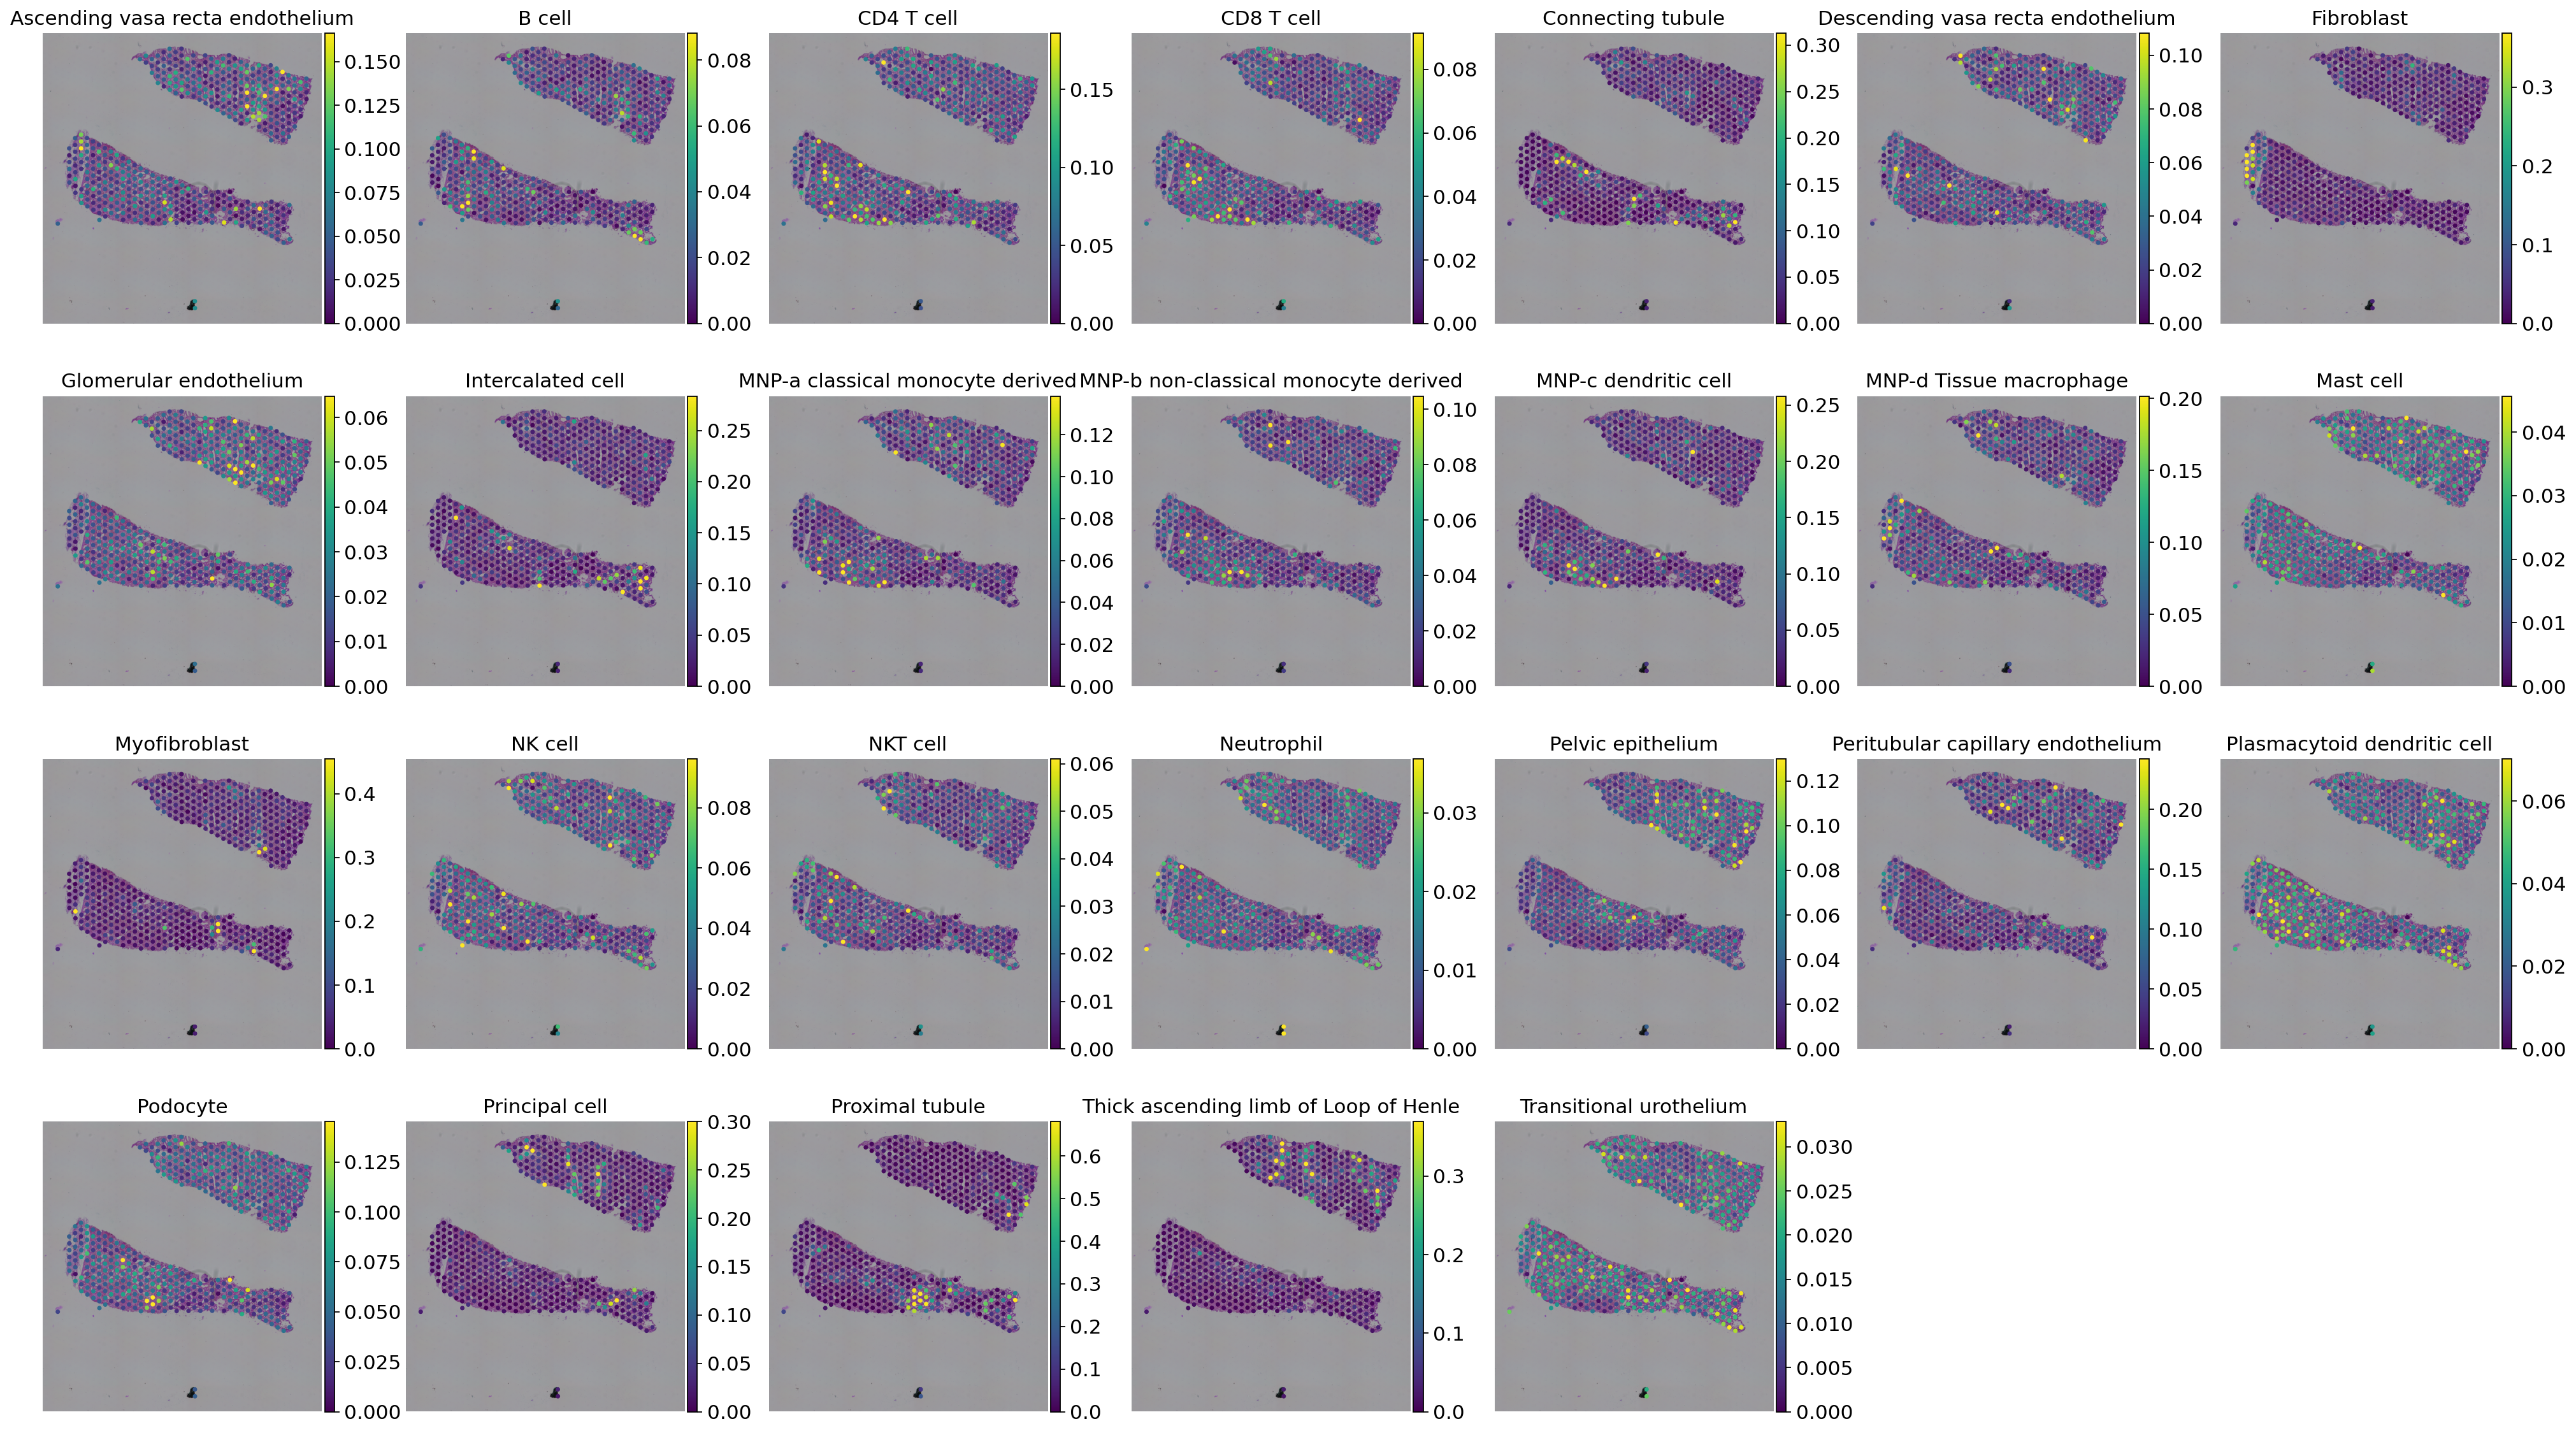

In [16]:
st_data = sc.read_h5ad(st_path)
assert (test_result_gnn.index == st_data.obs.index).all()
st_data.obs = pd.concat([st_data.obs, test_result_gnn], axis=1)
fig = sc.pl.spatial(
    st_data, color=list(test_result_gnn.columns)[0::], show=False, save=False, vmin=0.0, vmax="p99", wspace=0.1, ncols=7)
plt.savefig(f"./figures/anca_test_sample_{run_name}.png", dpi=80, bbox_inches="tight")
plt.show()

/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


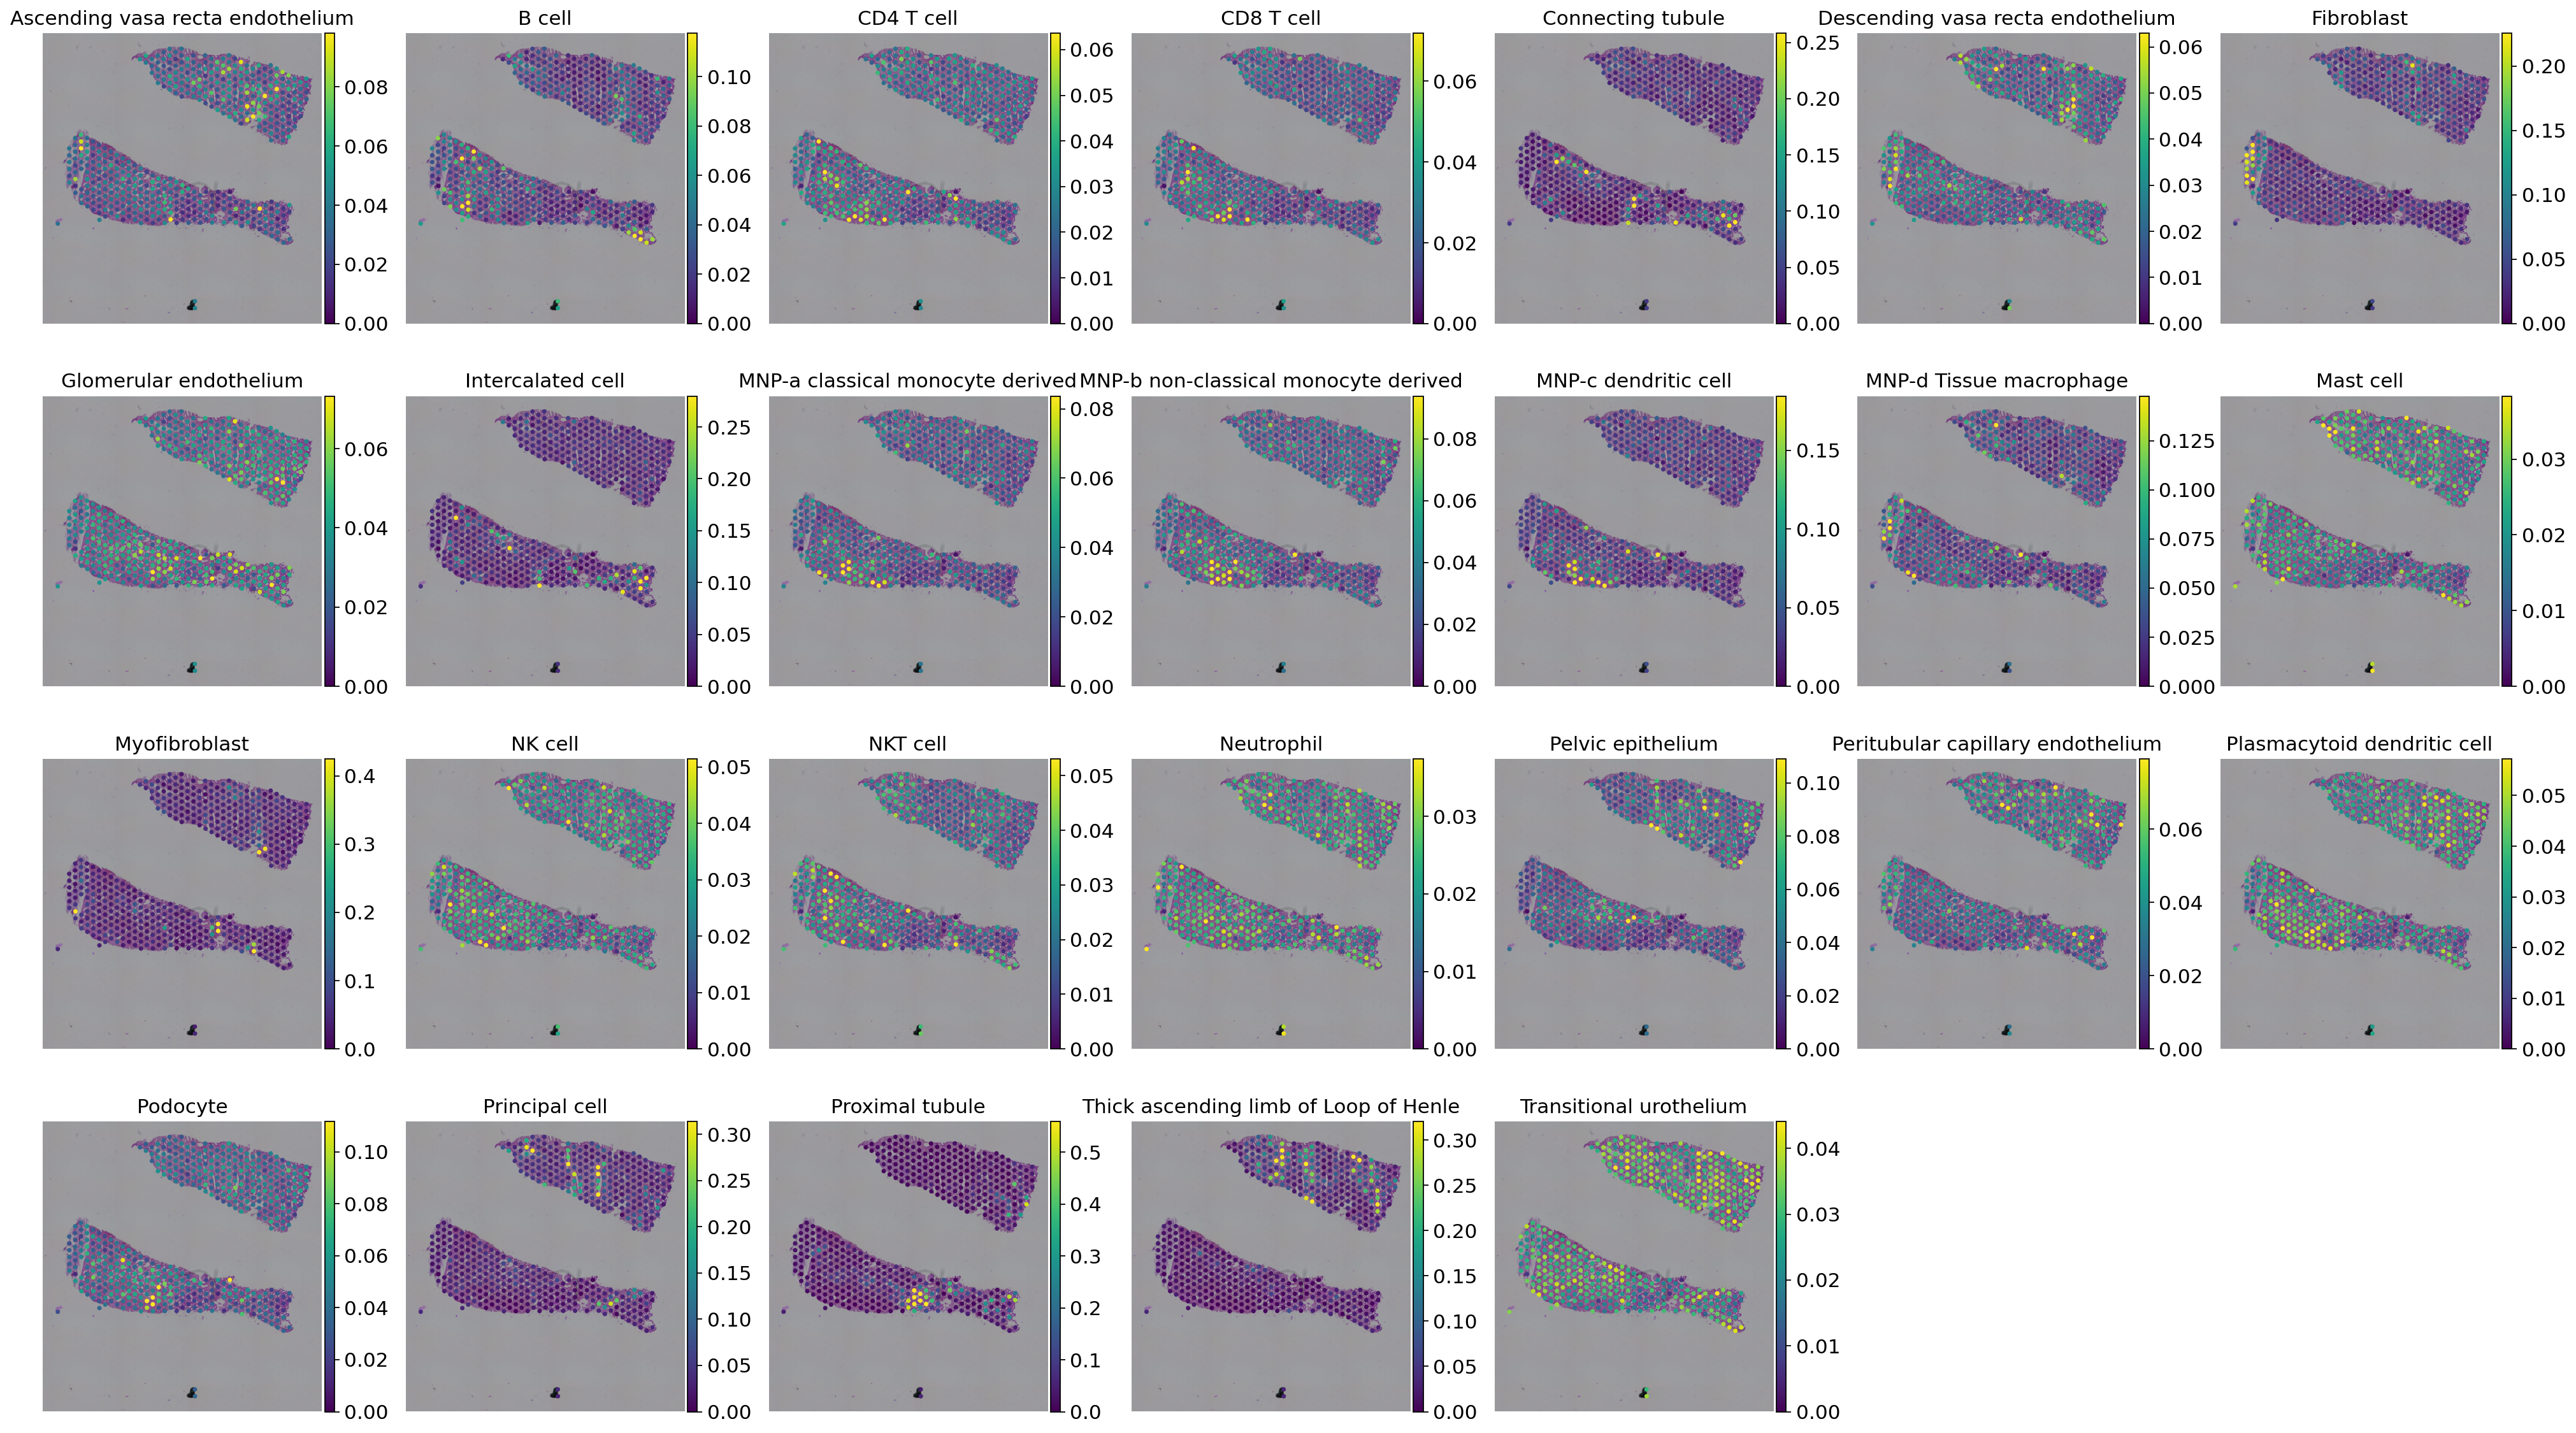

In [17]:
st_data = sc.read_h5ad(st_path)
assert (test_result_dissect.index == st_data.obs.index).all()
st_data.obs = pd.concat([st_data.obs, test_result_dissect], axis=1)
fig = sc.pl.spatial(
    st_data, color=list(test_result_dissect.columns)[0::], show=False, save=False, vmin=0.0, vmax="p99", wspace=0.1, ncols=7)
plt.savefig(f"./figures/anca_test_sample_dissect.png", dpi=80, bbox_inches="tight")
plt.show()

### Closer look at CD4+ T cells

/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


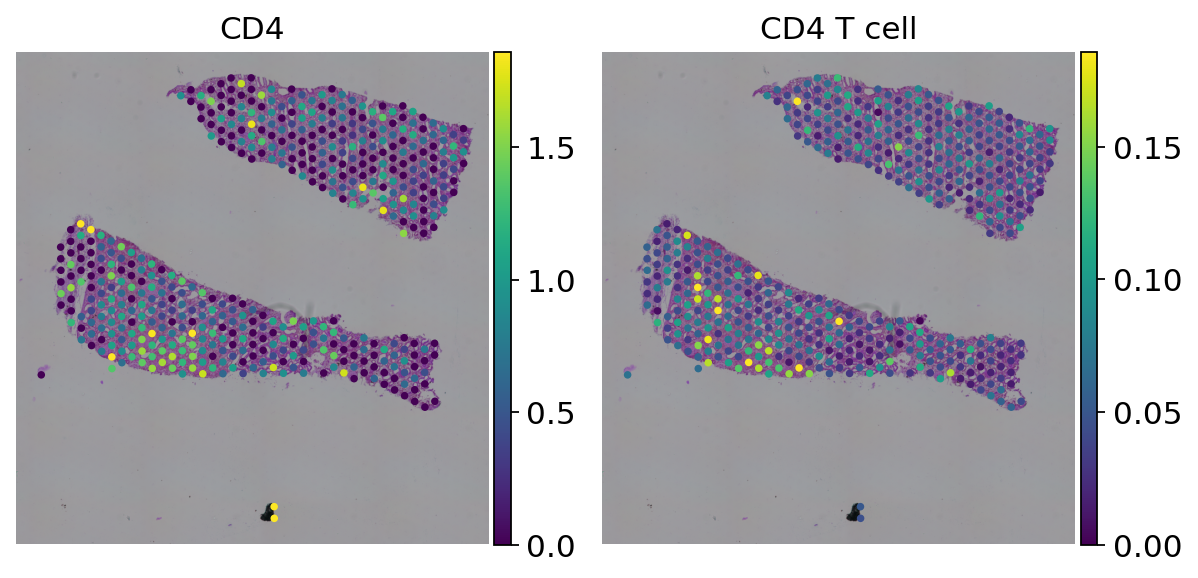

In [19]:
st_data = sc.read_h5ad(st_path)
assert (test_result_gnn.index == st_data.obs.index).all()
st_data.obs = pd.concat([st_data.obs, test_result_gnn], axis=1)
sc.pp.normalize_total(st_data, target_sum=1e4)
sc.pp.log1p(st_data)
fig = sc.pl.spatial(
    st_data, color=["CD4", "CD4 T cell"], show=False, save=False, vmin=0.0, vmax="p99", wspace=0.1, ncols=2)
plt.savefig(f"./figures/anca_test_sample_cd4_{run_name}.png", dpi=200, bbox_inches="tight")
plt.show()